In [54]:
import csv
import math
import numpy as np
from matplotlib import pyplot as plt



Wczytanie danych

In [55]:
with open('./measurements.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data = [row for row in csvreader]
    data = np.array(data, dtype=np.float32)

x = data[:, 0]
y = data[:, 1]

print(x.dtype, y.dtype)


float32 float32


Funkcja obliczająca przewidywane wartości dla x

In [56]:
def h_fun(x, theta_0, theta_1):
    '''
    :param x: ndarray o wymiarze ilości przykładów
    :param theta_0: parametr wolny modelu regresji liniowej jednej zmiennej
    :param theta_1: parametr przy xi modelu regresji liniowej jednej zmiennej
    :return: ndarray o wymiarze takim samym jak x, który zawiera wartości f. regresji liniowej dla podanych wag
    '''

    return theta_0 + theta_1 * x
    

    # todo

Funkcja licząca wartości kosztu dla daneych parametrów modelu

In [57]:
def calculate_cost(x, y, theta_0, theta_1):
    '''
    :param x: ndarray o wymiarze ilości przykładów
    :param y: ndarray z wartościami referencyjnymi o wymiarze takim jak x
    :param theta_0: parametr wolny modelu regresji liniowej jednej zmiennej
    :param theta_1: parametr przy xi modelu regresji liniowej jednej zmiennej
    :return: wartość funkcji kosztu dla podanych paramterów modelu
    '''
    m = len(x)
    cost = 0

    for i in range(m):

        cost += ((h_fun(x[i],theta_0,theta_1) - y[i]) ** 2) / (2 * m)
    
    return cost


    # todo

Theta 0:0.006487626116722822, Theta 1: 0.3153841495513916
Koszt:0.6391740441322327


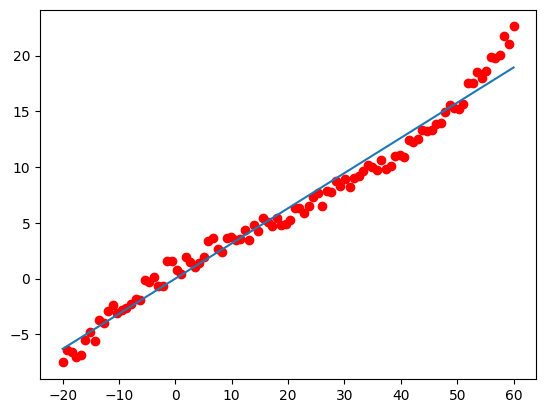

In [58]:
eps = 1e-5  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
alpha = 0.001  # learning rate
theta_0 = 0  # - wartości początkowe parametrów modelu
theta_1 = 0
m = len(x)
cost_old = calculate_cost(x,y,theta_0,theta_1)
cost_new = np.inf

while abs(cost_old - cost_new) > eps:
    grad0 = 0
    grad1 = 0

    for i in range(m):
        grad0 += h_fun(x[i],theta_0,theta_1) - y[i]
        grad1 += (h_fun(x[i],theta_0,theta_1) - y[i])*x[i]

    gradient_theta_0 = (alpha/m) * grad0
    gradient_theta_1 = (alpha/m) * grad1

    theta_0 -= gradient_theta_0
    theta_1 -= gradient_theta_1



    cost_old = cost_new
    cost_new = calculate_cost(x,y,theta_0,theta_1)


print(f"Theta 0:{theta_0}, Theta 1: {theta_1}")
print(f"Koszt:{cost_new}")

y_reg = h_fun(x,theta_0,theta_1)

plt.plot(x,y_reg)
plt.scatter(x,y,color='red')

Regresja liniowa wielu zmiennych

Zmiana wymiarów

In [59]:
X = np.vstack([np.ones(x.shape), x])
y.shape = [1, -1]

print(X.shape)
print(y.shape)

(2, 100)
(1, 100)


In [60]:
def h_funwz(X, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: 
    '''
    print(theta.shape)
    print(X.shape)
    return theta.T @ X # przykładowa realizacja, @ - mnożenie macierzowe

In [ ]:
def calculate_costwz(X, y, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param y: ndarray z wartościami referencyjnymi o wymiarze (1, m)
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: wartość f. kosztu
    '''
    m = len(X)
    cost = 0

    

    cost = ((h_funwz(X,theta) - y) ** 2) 
    
    return cost.sum() / (2 * m)

    
    # todo

In [63]:
eps = 1e-5  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
alpha = 0.001  # learning rate
theta = np.array([[0], [0]])
m = len(x)
cost_old = calculate_costwz(X,y,theta)
cost_new = np.inf



while abs(cost_old - cost_new) > eps:
    grad0 = 0
    grad1 = 0

    # for i in range(m):
    #     grad1 += (h_fun(x[i],theta) - y[i]) * x[i]

    h_y_diff = (h_funwz(X, theta) - y)
    gradient = h_y_diff @ X.T
    theta = theta - alpha * gradient.T / m

    cost_old = cost_new
    cost_new = calculate_costwz(X,y,theta)


print(f"Theta:{theta}")

(2, 1)
(2, 100)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()